In [2]:
# so what is the goal here
# Predicting the price a car should be sold?

# Factors that would be important
# Age of car
# Condition of car
# Type of drive the car is
# Manufacturer of car?
# Model of car
# Region of car
# State of car
# Number of cylinders determines pick up
# Size would also matter I guess

# Create description word cloud from description of each car, see whats in common

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('vehicles.csv')

In [5]:
sns.__version__

'0.9.0'

In [6]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,is_expensive
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690,cheap
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240,medium
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654,very cheap
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710,medium
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963,very cheap


In [7]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive'],
      dtype='object')

In [8]:
def print_distribution(labels,sizes,distribution_size,title,num_values=None):
    
    #distribution_size = data[column].shape[0]
    if num_values is None == False:
        labels = labels[: :]
        sizes = sizes[: :]
    else:
        labels = labels[:num_values]
        sizes = sizes[:num_values]
    print(title)
    percentages = list()
    for i in range(0,len(labels)):
        percentage = round(float(sizes[i]/distribution_size)*100,2)
        print('Value: ' + labels[i] + ' Percentage: ' + str(percentage) + ' %')
        percentages.append(percentage)
    sns.set(font_scale=2)
    ax = sns.barplot(x=labels, y=percentages)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    
    return percentages, labels

In [9]:
# so what is the goal here
# Predicting the price a car should be sold?

# Factors that would be important
# Age of car
# Condition of car
# Type of drive the car is
# Manufacturer of car?
# Model of car
# Number of cylinders determines pick up
# Size would also matter I guess

# Create description word cloud from description of each car, see whats in common

In [10]:
data['size'].value_counts()

full-size      75430
mid-size       40304
compact        20906
sub-compact     3224
Name: size, dtype: int64

In [11]:
data['title_status'].value_counts()

# The following are just hypothesis

# Lien means car payment still needs to be owed,
# Rebuilt cars might not get the pay necessary?, because of trust worthy quality? depends on manufacturer
# Salvaged cars will have the lowest price 
# clean cars will have highest price

clean         412803
rebuilt        11648
salvage         5572
lien            2857
missing          763
parts only       290
Name: title_status, dtype: int64

In [12]:
data['condition'].value_counts()

excellent    118422
good          93968
like new      27592
fair           6969
new            1342
salvage         699
Name: condition, dtype: int64

In [13]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive'],
      dtype='object')

In [14]:
# fwd vehicle has better fuel economy, do well in inclement weather, not fun to drive in rain
# rwd more prone to loss of traction do not perform well in inclement weather
# 4wd operates in rwd format to conserve fue, opreates as a rear wheel drive vehicle the most, has power to take on any
# terrain or weather condition

In [15]:
sns.set(style="whitegrid")

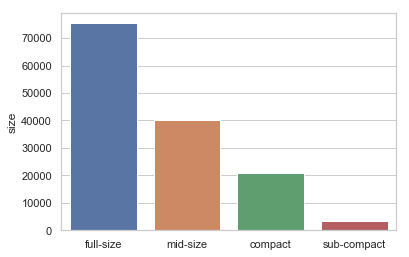

In [16]:
ax = sns.barplot(x=data['size'].value_counts().index, y=data['size'].value_counts())

Full size cars are clearly the most popular, with relatively no one selling sub-compacts

In [17]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive'],
      dtype='object')

In [18]:
data.price.describe()

count    435734.000000
mean      12929.591751
std       11991.919263
min           0.000000
25%        4900.000000
50%        9995.000000
75%       17988.000000
max      240000.000000
Name: price, dtype: float64

In [19]:
#data = pd.read_csv('vehicles.csv')

In [20]:
data = data[data.price < 250000]

In [21]:
data.price.describe()

count    435734.000000
mean      12929.591751
std       11991.919263
min           0.000000
25%        4900.000000
50%        9995.000000
75%       17988.000000
max      240000.000000
Name: price, dtype: float64

In [22]:
import datetime

In [23]:
def create_bins(ranges,values,data,result,size,default_value):
    
    num_errors = 0
    errors = list()
    low_end = list()
    high_end = list()
    rows = list()
    
    for i in range(0,size):
        result.append(default_value)
        
    for i in range(0,len(ranges)):
        low_end.append(int(ranges[i].split('-')[0]))
        high_end.append(int(ranges[i].split('-')[1]))
        
    for i in range(0,size):
        for j in range (0,len(values)):
            if data[i] >= low_end[j] and data[i] <= high_end[j]:
                result[i] = values[j]
                
                
    print('Done With Binning')
   #print('First Duplicate: ' + str(dupes[0]))
    
    return result

In [24]:
values = ['vche','che','med','exp','vexp','rexp']
ranges = ['0-3000','3001-8000','8001-15000','15001-25000','25001-50000','50001-10000000']
x = list()

'''
for i in range(0,data.shape[0]):
    x.append('0')
data['is_expensive'] = x
'''
a = datetime.datetime.now()
x = create_bins(ranges,values,list(data['price']),x,data.shape[0],'n/a')
b = datetime.datetime.now()
delta = b - a
print('Time Taken for 10000 rows in milliseconds: ' + str(delta.total_seconds() * 1000))
print('Time Taken for 10000 rows in seconds: ' + str(delta.total_seconds()))

Done With Binning
Time Taken for 10000 rows in milliseconds: 492.682
Time Taken for 10000 rows in seconds: 0.492682


In [25]:
print('Number Rows in list: ' + str(len(x)))
print('Number rows in dataset: ' + str(data.shape[0]))
print(len(list(data['price'])))

Number Rows in list: 435734
Number rows in dataset: 435734
435734


In [26]:
data['is_expensive'] = x

In [27]:
data['is_expensive'].value_counts()

che     114934
med     110501
exp      84384
vche     71635
vexp     49242
rexp      5038
Name: is_expensive, dtype: int64

In [28]:
#data.to_csv('vehicles.csv',index=False)

In [29]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive'],
      dtype='object')

In [30]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,is_expensive
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690,che
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240,med
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654,vche
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710,med
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963,vche


In [31]:
data['is_expensive'].value_counts()

che     114934
med     110501
exp      84384
vche     71635
vexp     49242
rexp      5038
Name: is_expensive, dtype: int64

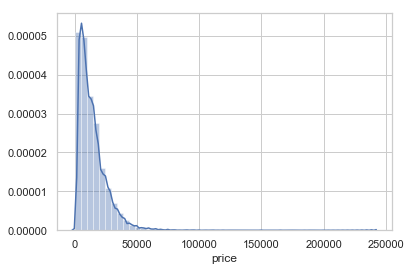

In [32]:
sns.distplot(data.price)

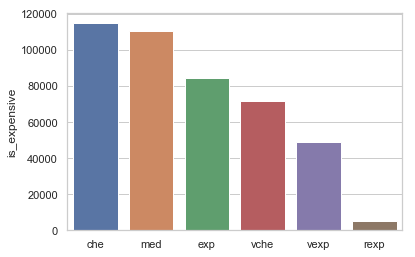

In [33]:
sns.barplot(x=data['is_expensive'].value_counts()[: :].index, y=data['is_expensive'].value_counts()[: :])

Most cars appear to be $20000 or less

In [34]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive'],
      dtype='object')

In [35]:
data['age'] = 2021 - data.year

In [36]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age'],
      dtype='object')

In [37]:
age = data['age'].dropna()

In [38]:
data.age.value_counts()

4.0      34588
6.0      32913
5.0      32093
7.0      31700
8.0      31431
9.0      29103
10.0     26529
13.0     22642
14.0     20454
3.0      20139
11.0     19955
15.0     17190
12.0     15897
2.0      15526
16.0     14204
17.0     12036
18.0      9235
19.0      7153
20.0      5739
21.0      4777
22.0      3741
1.0       2818
23.0      2351
24.0      2059
25.0      1528
26.0      1433
27.0      1110
28.0       825
29.0       760
30.0       649
         ...  
90.0        60
80.0        60
82.0        59
121.0       58
91.0        52
85.0        50
87.0        44
89.0        39
98.0        37
94.0        34
93.0        27
83.0        22
79.0        22
86.0        18
88.0        17
95.0        11
96.0         9
97.0         8
109.0        5
99.0         4
105.0        3
77.0         3
102.0        2
108.0        1
78.0         1
106.0        1
101.0        1
104.0        1
76.0         1
110.0        1
Name: age, Length: 109, dtype: int64

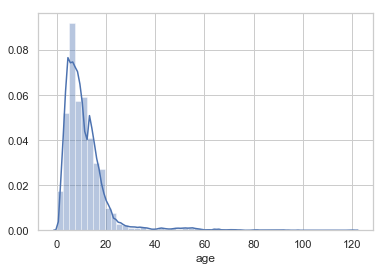

In [39]:
sns.distplot(age)

There are actually some cars that are 100+ years old!

In [40]:
data.age.describe()
#super_old_cars = data[data.age > 50]

count    434617.000000
mean         11.128978
std           9.301892
min           0.000000
25%           6.000000
50%           9.000000
75%          14.000000
max         121.000000
Name: age, dtype: float64

In [41]:
data.shape[0]

435734

In [42]:
data.age.shape[0]

435734

In [43]:
x = list()
ranges = ['0-5','6-10','11-20','21-30','31-10000']

values = ['new','medium-old','old','very old','ridiculously old']
x = create_bins(ranges,values,list(data['age']),x,data.shape[0],'n/a')

Done With Binning


In [44]:
print(len(x))
print(data.shape[0])
data['age_category'] = x

435734
435734


In [45]:
data['age_category'].value_counts()

medium-old          151676
old                 144505
new                 105283
very old             19233
ridiculously old     13920
n/a                   1117
Name: age_category, dtype: int64

In [46]:
data.is_expensive.value_counts()

che     114934
med     110501
exp      84384
vche     71635
vexp     49242
rexp      5038
Name: is_expensive, dtype: int64

In [47]:
data.condition.value_counts()

excellent    118422
good          93968
like new      27592
fair           6969
new            1342
salvage         699
Name: condition, dtype: int64

In [48]:
import matplotlib.pyplot as plt

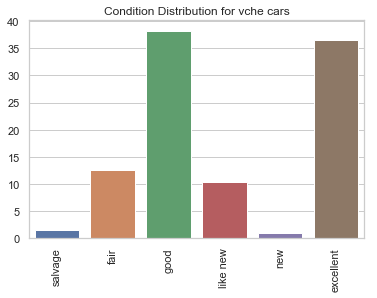

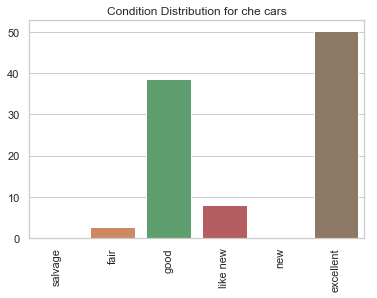

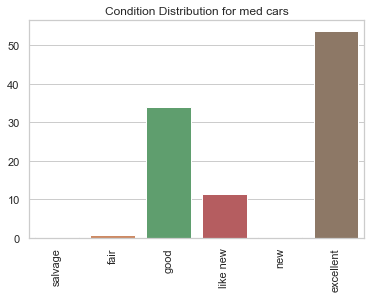

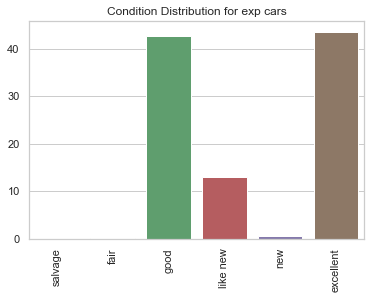

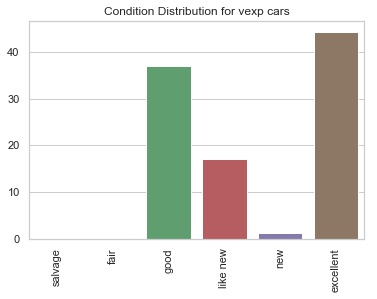

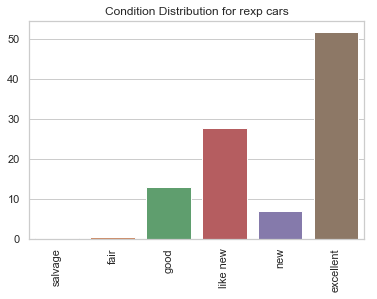

In [49]:
labels = ['vche','che','med','exp','vexp','rexp']
expense_condition_percentages = list()
conditions = ['salvage','fair','good', 'like new', 'new','excellent']
for expense_category in labels:
    cars = data.groupby('is_expensive').get_group(expense_category)
    sizes = list()
    for condition_category in conditions:
        sizes.append(cars.condition.value_counts()[condition_category])
    summ = sum(sizes)
    percents = [round(float(100 * (sizes[i]/summ)),2) for i in range(0, len(sizes))] 
    chart = sns.barplot(x=conditions, y=percents)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.set_title('Condition Distribution for ' + expense_category + ' cars')
    expense_condition_percentages.append(percents)
    plt.show()

In [50]:
for i in range(0,len(expense_condition_percentages)):
    print(expense_condition_percentages[i])

[1.34, 12.55, 38.3, 10.34, 0.87, 36.61]
[0.19, 2.64, 38.52, 8.0, 0.24, 50.41]
[0.09, 0.63, 33.99, 11.24, 0.3, 53.75]
[0.03, 0.19, 42.74, 12.96, 0.52, 43.57]
[0.02, 0.15, 37.06, 17.16, 1.28, 44.33]
[0.16, 0.47, 13.0, 27.63, 6.95, 51.79]


In [51]:
import numpy as np

In [52]:
np.savetxt('lineplot_data.txt', expense_condition_percentages,delimiter='\t') 

In [53]:
data.age_category.value_counts().index

Index(['medium-old', 'old', 'new', 'very old', 'ridiculously old', 'n/a'], dtype='object')

In [54]:
labels = ['vche','che','med','exp','vexp','rexp']
expense_percentages = list()
ages = ['new','medium-old','old', 'very old', 'ridiculously old','n/a']
for expense_category in labels:
    cars = data.groupby('is_expensive').get_group(expense_category)
    sizes = list()
    for age in ages:
        sizes.append(cars.age_category.value_counts()[age])
    summ = sum(sizes)
    percents = [round(float(100 * (sizes[i]/summ)),2) for i in range(0, len(sizes))] 
    expense_percentages.append(percents)

In [55]:
print(ages)
for i in range(0,len(expense_percentages)):
    print(labels[i] + ' ' + str(expense_percentages[i]))

['new', 'medium-old', 'old', 'very old', 'ridiculously old', 'n/a']
vche [22.9, 22.97, 39.56, 10.91, 3.65, 0.02]
che [1.89, 25.93, 62.23, 6.39, 3.55, 0.01]
med [18.97, 47.82, 27.73, 2.57, 2.82, 0.09]
exp [40.79, 42.14, 13.28, 1.05, 2.44, 0.31]
vexp [57.07, 32.99, 4.91, 0.58, 3.45, 1.01]
rexp [64.17, 15.46, 7.3, 1.39, 7.09, 4.59]


In [56]:
np.transpose(expense_percentages)

array([[2.290e+01, 1.890e+00, 1.897e+01, 4.079e+01, 5.707e+01, 6.417e+01],
       [2.297e+01, 2.593e+01, 4.782e+01, 4.214e+01, 3.299e+01, 1.546e+01],
       [3.956e+01, 6.223e+01, 2.773e+01, 1.328e+01, 4.910e+00, 7.300e+00],
       [1.091e+01, 6.390e+00, 2.570e+00, 1.050e+00, 5.800e-01, 1.390e+00],
       [3.650e+00, 3.550e+00, 2.820e+00, 2.440e+00, 3.450e+00, 7.090e+00],
       [2.000e-02, 1.000e-02, 9.000e-02, 3.100e-01, 1.010e+00, 4.590e+00]])

In [57]:
import statsmodels.api as sm

In [58]:
y = data['price']

In [59]:
age = []
for i in range(0, data.shape[0]):
    if isinstance(data.age[i], float):
        age.append(data.age[i])
    else:
        age.append(-1)
data['age'] = age
model = sm.OLS(data['age'],y)

In [60]:
data.corr()

,id,price,year,odometer,county,lat,long,age
id,1.000000,-0.044729,-0.021674,0.007029,NaN,-0.050956,-0.108738,0.021674
price,-0.044729,1.000000,0.210926,-0.200183,NaN,0.051121,-0.100622,-0.210926
year,-0.021674,0.210926,1.000000,-0.244137,NaN,-0.003259,-0.024716,-1.000000
odometer,0.007029,-0.200183,-0.244137,1.000000,NaN,0.003892,0.037358,0.244137
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.050956,0.051121,-0.003259,0.003892,NaN,1.000000,-0.166066,0.003259
long,-0.108738,-0.100622,-0.024716,0.037358,NaN,-0.166066,1.000000,0.024716
age,0.021674,-0.210926,-1.000000,0.244137,NaN,0.003259,0.024716,1.000000


In [61]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category'],
      dtype='object')

In [62]:
data.paint_color.value_counts()

white     80063
black     59698
silver    44674
blue      30461
grey      30346
red       29117
green      7578
custom     7249
brown      6548
yellow     2079
orange     2007
purple      721
Name: paint_color, dtype: int64

In [63]:
model = model.fit()

In [64]:
model.summary()

C:\Users\NikhilGaur\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\NikhilGaur\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\NikhilGaur\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\NikhilGaur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1408: RuntimeWarning: invalid value encountered in less
  term2 = np.where(denom < 0, term1, np.power((1-2.0/A)/denom, 1/3.0))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 23 Aug 2020   Prob (F-statistic):                nan
Time:                        11:33:08   Log-Likelihood:                    nan
No. Observations:              435734   AIC:                               nan
Df Residuals:                  435733   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price             nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
very_cheap_cars = data.groupby('is_expensive').get_group('vche')

In [66]:
labels = ['rexp', 'vexp', 'exp','med', 'che', 'vche']

Expense Distribution for excellent cars
Value: rexp Percentage: 0.83 %
Value: vexp Percentage: 8.21 %
Value: exp Percentage: 17.14 %
Value: med Percentage: 30.28 %
Value: che Percentage: 32.72 %
Value: vche Percentage: 10.81 %


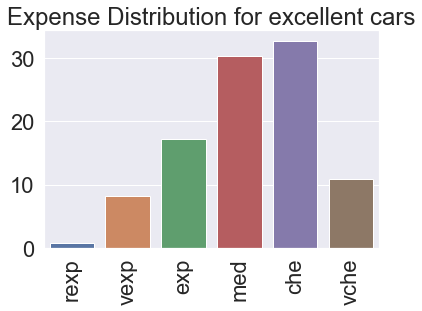

In [67]:
# for each condition type, plot the is_expensive distribution
condition = 'excellent'
expense_categories = data.is_expensive.value_counts().index
d = data.groupby('condition').get_group(condition)
sizes = list()
#labels = ['rexp', 'vexp', 'exp','med', 'che', 'vche']
for category in labels:
    sizes.append(d.groupby('is_expensive').get_group(category).shape[0])
percentages, labels = print_distribution(labels,sizes,d.shape[0],'Expense Distribution for' + ' ' + condition + ' cars')
#conditions = data.

In [68]:
import matplotlib.pyplot as plt

In [69]:
labels

['rexp', 'vexp', 'exp', 'med', 'che', 'vche']

In [70]:
labels = ['che','med','exp','vche','vexp','rexp']

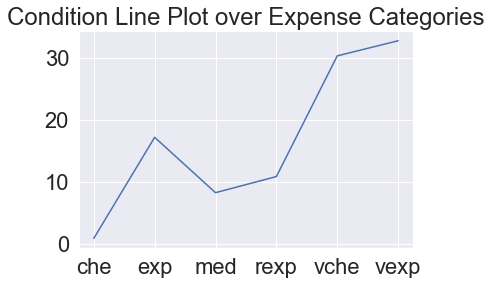

In [71]:
ax = sns.lineplot(x=labels, y=percentages)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Condition Line Plot over Expense Categories')
plt.savefig("condition_expense_multi_line_plot.png")

In [72]:
vche = data.groupby('is_expensive').get_group('vche')

In [73]:
vche.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category'],
      dtype='object')

In [74]:
vche.manufacturer.value_counts().index

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'dodge', 'jeep',
       'ram', 'gmc', 'hyundai', 'chrysler', 'volkswagen', 'bmw', 'kia',
       'subaru', 'mercedes-benz', 'cadillac', 'buick', 'mazda', 'pontiac',
       'acura', 'lexus', 'mitsubishi', 'lincoln', 'volvo', 'mercury',
       'infiniti', 'audi', 'saturn', 'rover', 'mini', 'jaguar', 'fiat',
       'tesla', 'datsun', 'alfa-romeo', 'harley-davidson', 'porche', 'ferrari',
       'land rover', 'morgan'],
      dtype='object')

In [75]:
vche.manufacturer.value_counts().head()

ford         12616
chevrolet     9954
toyota        4859
honda         4202
nissan        4021
Name: manufacturer, dtype: int64

In [76]:
sizes = np.array(vche.manufacturer.value_counts())

In [77]:
sizes = sizes*100

In [78]:
sizes

array([1261600,  995400,  485900,  420200,  402100,  306600,  259000,
        255100,  232800,  196100,  164900,  152400,  149900,  140700,
        126700,  119500,  114300,  113900,   98200,   92300,   68700,
         64300,   57600,   54700,   53300,   52500,   52500,   51400,
         48800,   19200,   17100,   13700,    9400,    3600,    1500,
          1100,     700,     500,     400,     400,     100], dtype=int64)

(0.6, 0)
(0.6, 0)
(0.6, 0)
(0.6, 0)
(0.6, 0)
(0.6, 0)


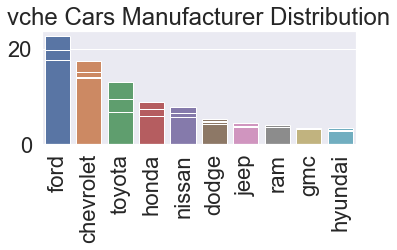

In [79]:
d = data.groupby('condition').get_group(condition)
sizes = list()
labels = ['rexp', 'vexp', 'exp','med', 'che', 'vche']
# for each cheapness level count how many cars there are of a certain brand, 
# divide by the total number of cars of that cheapness level
for label in labels:
    category =  data.groupby('is_expensive').get_group(label)
    total = category.shape[0]
    values = category.manufacturer.value_counts().index
    sizes = np.array(category.manufacturer.value_counts())
    sizes = (sizes * 100)/total
    
    '''
    print('Manufacture Distribution For ' + label + ' cars')
    print()
    for x in range(0, 10):
        print('Manufacturer: ' + values[x] + ' Percentage: ' + str(sizes[x]))

    print()
    print()
    '''
    ax = sns.barplot(x=values[:10], y=sizes[:10])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    title = label + ' Cars Manufacturer Distribution'
    ax.set_title(title)
    plt.tight_layout()
    print(ax.patches[1].xy)
    

    plt.savefig(title, dpi=200, bbox_inches = "tight") #dpi=300, bbox_inches = "tight"

In [80]:
mercedes_benz = data.groupby('manufacturer').get_group('mercedes-benz')

In [81]:
mercedes_benz.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category'],
      dtype='object')

Text(0.5,1,'Mercedes Benz Price Category Distribution')

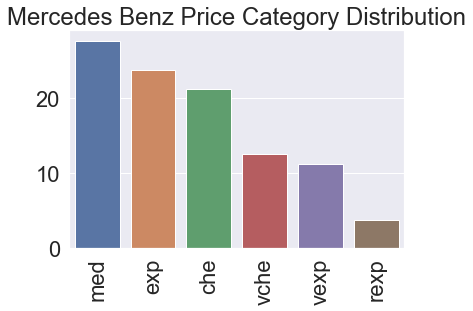

In [82]:
mercedes_benz = data.groupby('manufacturer').get_group('mercedes-benz')
values = mercedes_benz.is_expensive.value_counts().index
sizes = np.array(mercedes_benz.is_expensive.value_counts())
total = mercedes_benz.shape[0]
sizes = (sizes * 100)/total
ax = sns.barplot(x=values[:10], y=sizes[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = 'Mercedes Benz Price Category Distribution'
ax.set_title(title)

Text(0.5,1,'Hyundai Price Category Distribution')

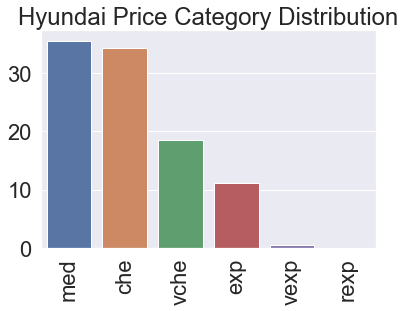

In [83]:
hyundai = data.groupby('manufacturer').get_group('hyundai')
values = hyundai.is_expensive.value_counts().index
sizes = np.array(hyundai.is_expensive.value_counts())
total = hyundai.shape[0]
sizes = (sizes * 100)/total
ax = sns.barplot(x=values[:10], y=sizes[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = 'Hyundai Price Category Distribution'
ax.set_title(title)

Text(0.5,1,'Volkswagen Price Category Distribution')

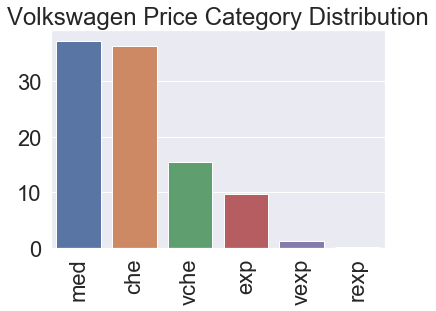

In [84]:
volkswagen = data.groupby('manufacturer').get_group('volkswagen')
values = volkswagen.is_expensive.value_counts().index
sizes = np.array(volkswagen.is_expensive.value_counts())
total = volkswagen.shape[0]
sizes = (sizes * 100)/total
ax = sns.barplot(x=values[:10], y=sizes[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = 'Volkswagen Price Category Distribution'
ax.set_title(title)

Text(0.5,1,'Ram Price Category Distribution')

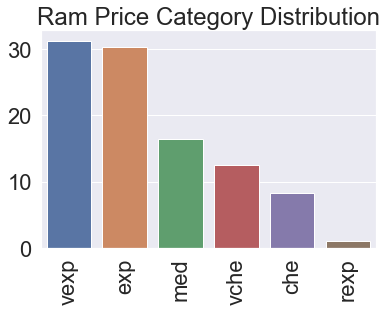

In [85]:
ram = data.groupby('manufacturer').get_group('ram')
values = ram.is_expensive.value_counts().index
sizes = np.array(ram.is_expensive.value_counts())
total = ram.shape[0]
sizes = (sizes * 100)/total
ax = sns.barplot(x=values[:10], y=sizes[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = 'Ram Price Category Distribution'
ax.set_title(title)

Text(0.5,1,'Tesla Price Category Distribution')

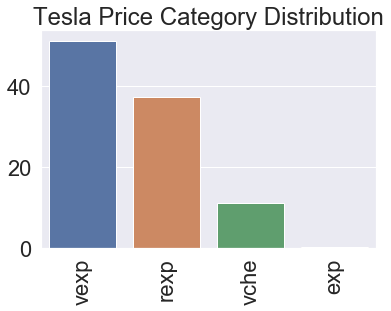

In [86]:
tesla = data.groupby('manufacturer').get_group('tesla')
values = tesla.is_expensive.value_counts().index
sizes = np.array(tesla.is_expensive.value_counts())
total = tesla.shape[0]
sizes = (sizes * 100)/total
ax = sns.barplot(x=values[:10], y=sizes[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = 'Tesla Price Category Distribution'
ax.set_title(title)

Text(0.5,1,'BMW Price Category Distribution')

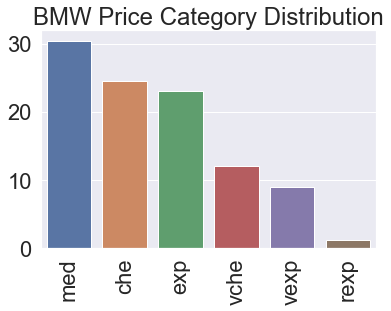

In [87]:
bmw = data.groupby('manufacturer').get_group('bmw')
values = bmw.is_expensive.value_counts().index
sizes = np.array(bmw.is_expensive.value_counts())
total = bmw.shape[0]
sizes = (sizes * 100)/total
ax = sns.barplot(x=values[:10], y=sizes[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = 'BMW Price Category Distribution'
ax.set_title(title)

Text(0.5,1,'Ford Price Category Distribution')

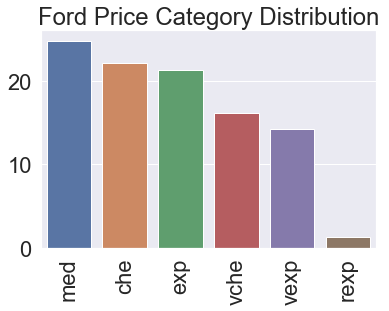

In [88]:
ford = data.groupby('manufacturer').get_group('ford')
values = ford.is_expensive.value_counts().index
sizes = np.array(ford.is_expensive.value_counts())
total = ford.shape[0]
sizes = (sizes * 100)/total
ax = sns.barplot(x=values[:10], y=sizes[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = 'Ford Price Category Distribution'
ax.set_title(title)

In [89]:
bmw = data.groupby('manufacturer').get_group('bmw')
tesla = data.groupby('manufacturer').get_group('tesla')
gmc = data.groupby('manufacturer').get_group('gmc')

In [90]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category'],
      dtype='object')

In [91]:
data.type.value_counts()

SUV            80144
sedan          79905
pickup         40930
truck          39506
coupe          17404
other          12866
hatchback      12396
van             9963
wagon           9897
convertible     8592
mini-van        5906
offroad          650
bus              528
Name: type, dtype: int64

In [92]:
''' This function prints out a distribution by first grouping the data, passed in, and then focusing on a certain variable, to
visualize differences between the different groups amongst that variable.

Example: if there are different prices for used cars , such as they are very cheap, cheap, etc. and each of those price categories
sells a particular type of car manufacturer, we want to see what the distribution of manufacturers for each type of car expensiveness'''

def groupby_barchart_percent_distribution(data, column, label, title,variable=None):
    
    if variable is None == False:
        category = data.groupby(column).get_group(label)
    else:
        category = data[column]
    total = category.shape[0]
    if variable is None == False:
        values = category[variable].value_counts().index
        sizes = np.array(category[variable].value_counts())
    else:
        values = category.value_counts().index
        sizes = np.array(category.value_counts())
    sizes = (sizes * 100)/total
    if len(values) > 10:
        values = values[:10]
        sizes = sizes[:10]
    ax = sns.barplot(x=values, y=sizes)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title + label + ' cars')
    plt.savefig(title, dpi=200, bbox_inches = "tight") #dpi=300, bbox_inches = "tight"

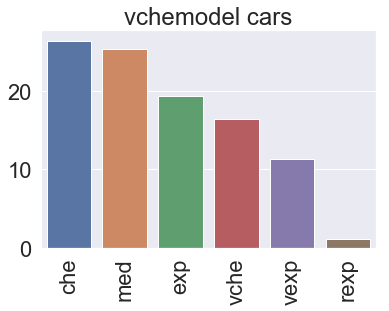

In [93]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'model', 'vche', 'Model Distribution for ')

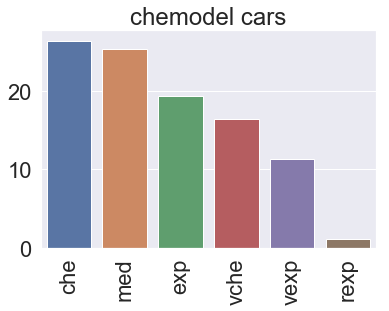

In [94]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'model','che', 'Model Distribution for ')

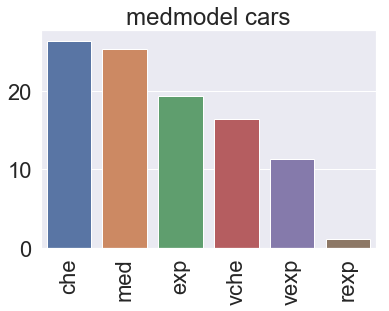

In [95]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'model', 'med', 'Model Distribution for ')

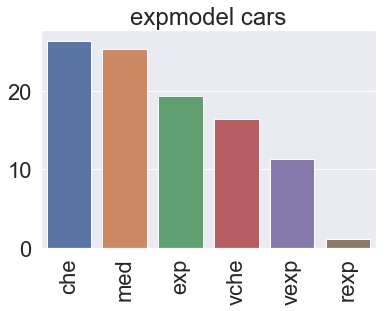

In [96]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'model', 'exp', 'Model Distribution for ')

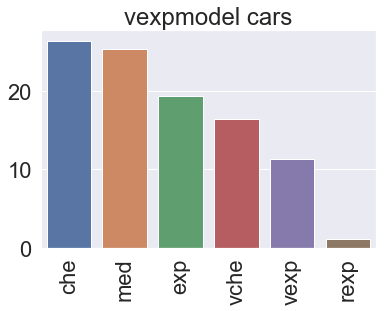

In [97]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'model', 'vexp', 'Model Distribution for ')

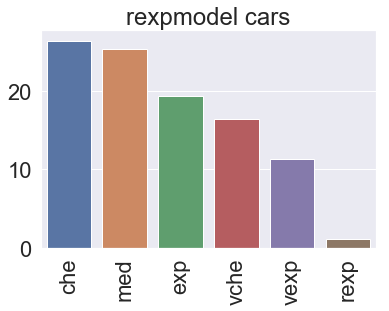

In [98]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'model', 'rexp', 'Model Distribution for ')

In [99]:
data.fuel.value_counts()

gas         376312
diesel       37804
other        13337
hybrid        4266
electric      1024
Name: fuel, dtype: int64

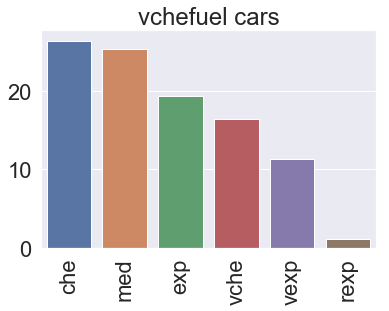

In [100]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'fuel', 'vche', 'Model Distribution for ')

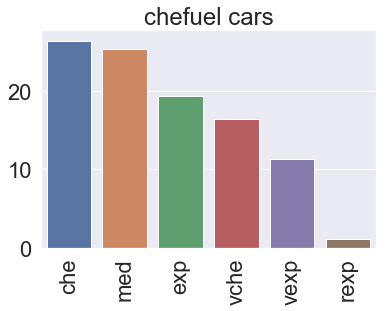

In [101]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'fuel', 'che', 'Model Distribution for ')

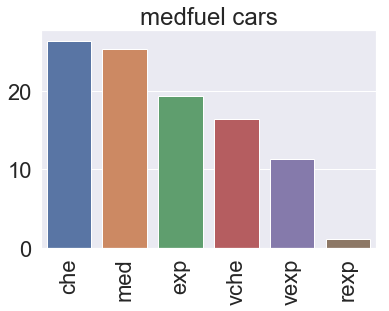

In [102]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'fuel', 'med', 'Model Distribution for ')

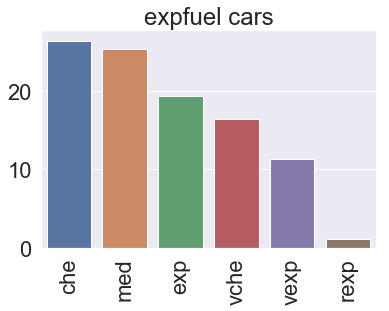

In [103]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'fuel', 'exp', 'Model Distribution for ')

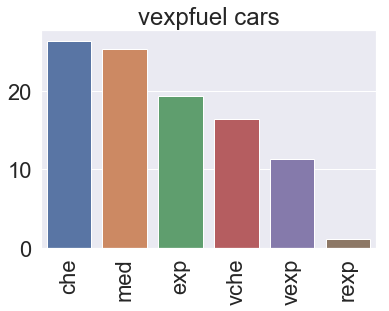

In [104]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'fuel', 'vexp', 'Model Distribution for ')

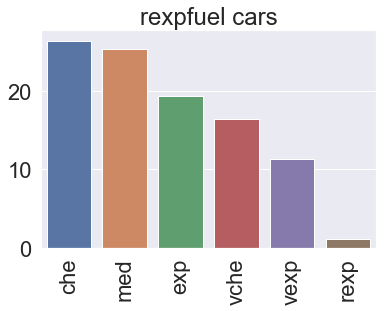

In [105]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'fuel', 'rexp', 'Model Distribution for ')

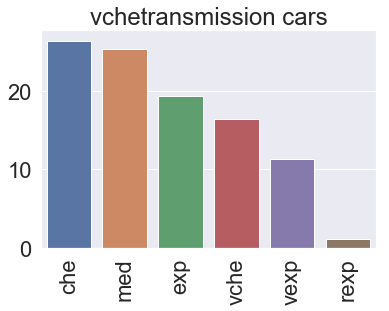

In [106]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'transmission', 'vche', 'Model Distribution for ')

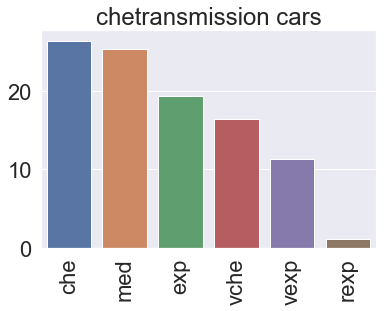

In [107]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'transmission', 'che', 'Model Distribution for ')

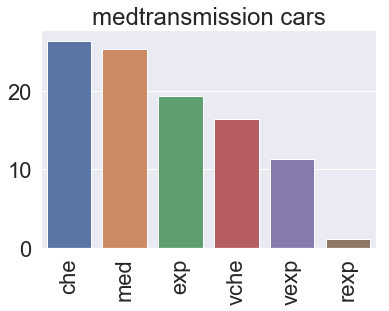

In [108]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'transmission', 'med', 'Model Distribution for ')

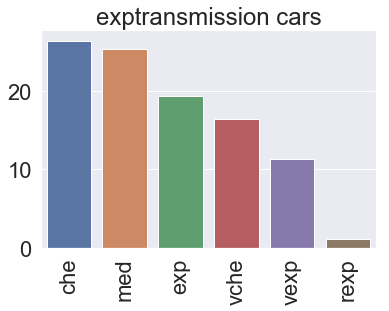

In [109]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'transmission', 'exp', 'Model Distribution for ')

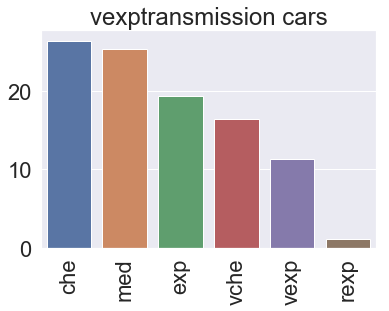

In [110]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'transmission', 'vexp', 'Model Distribution for ')

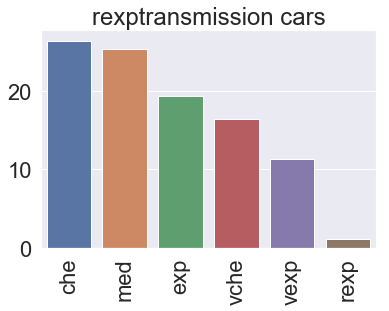

In [111]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'transmission', 'rexp', 'Model Distribution for ')

In [112]:
data.drive.value_counts()

4wd    142694
fwd    111130
rwd     59958
Name: drive, dtype: int64

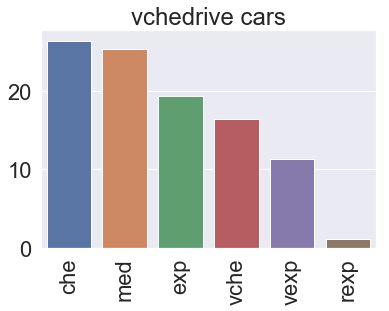

In [113]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'drive', 'vche', 'Model Distribution for ')

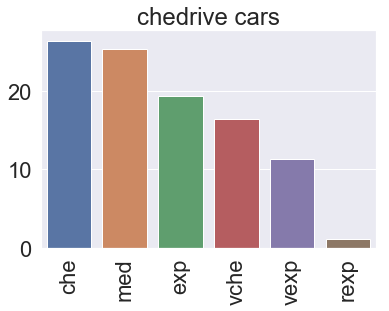

In [114]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'drive', 'che', 'Model Distribution for ')

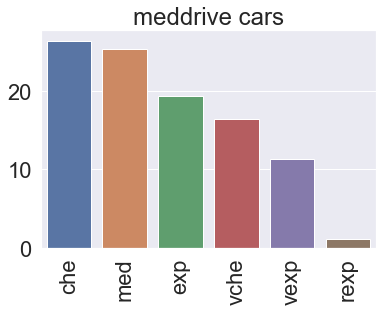

In [115]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'drive', 'med', 'Model Distribution for ')

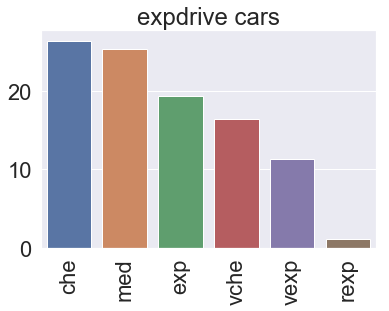

In [116]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'drive', 'exp', 'Model Distribution for ')

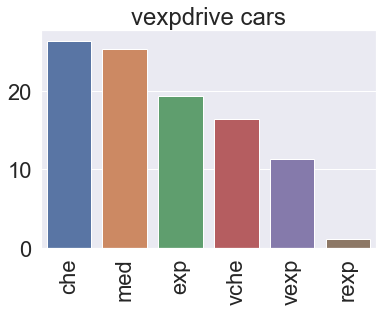

In [117]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'drive', 'vexp', 'Model Distribution for ')

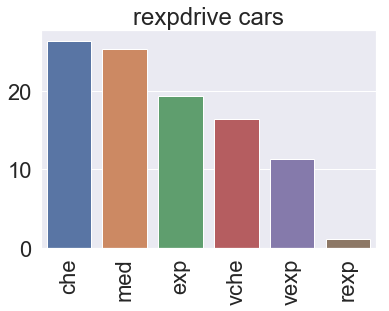

In [118]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'drive', 'rexp', 'Model Distribution for ')

In [119]:
data['size'].value_counts()

full-size      75430
mid-size       40304
compact        20906
sub-compact     3224
Name: size, dtype: int64

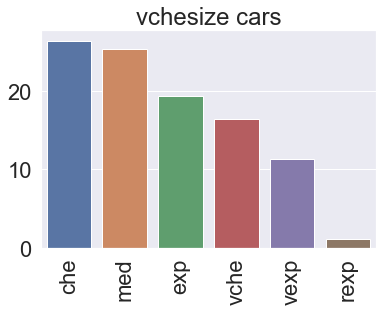

In [120]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'size', 'vche', 'Model Distribution for ')

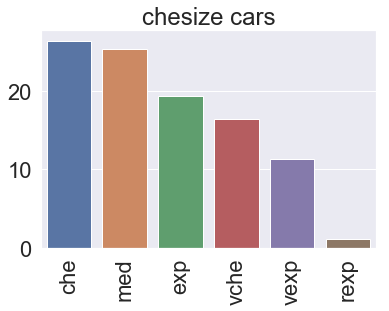

In [121]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'size', 'che', 'Model Distribution for ')

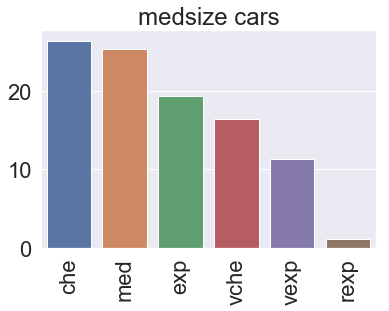

In [122]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'size', 'med', 'Model Distribution for ')

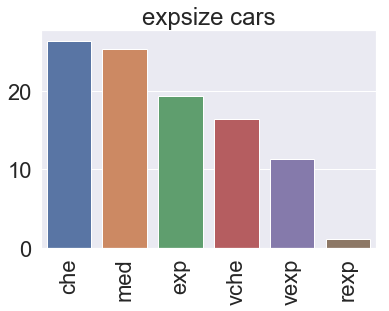

In [123]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'size', 'exp', 'Model Distribution for ')

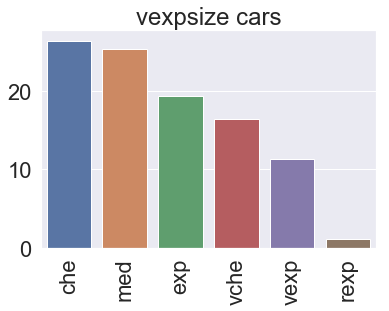

In [124]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'size', 'vexp', 'Model Distribution for ')

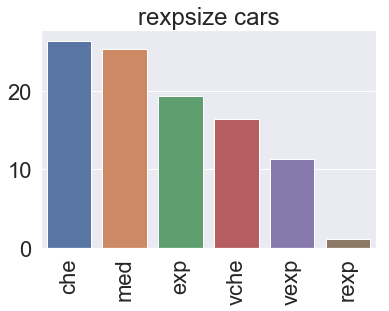

In [125]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'size', 'rexp', 'Model Distribution for ')

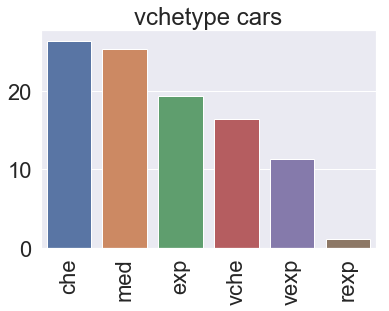

In [126]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'type', 'vche', 'Model Distribution for ')

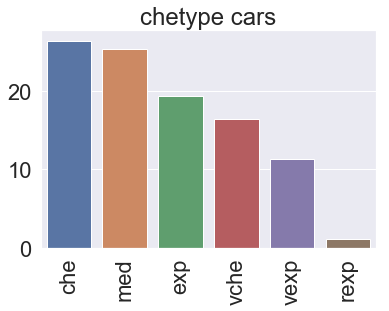

In [127]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'type', 'che', 'Model Distribution for ')

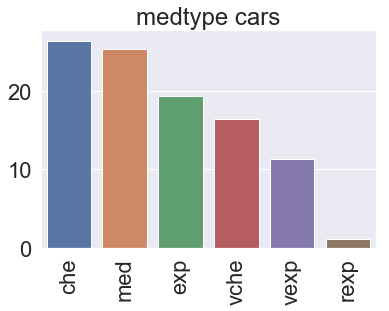

In [128]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'type', 'med', 'Model Distribution for ')

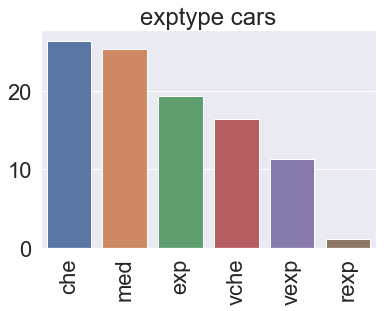

In [129]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'type', 'exp', 'Model Distribution for ')

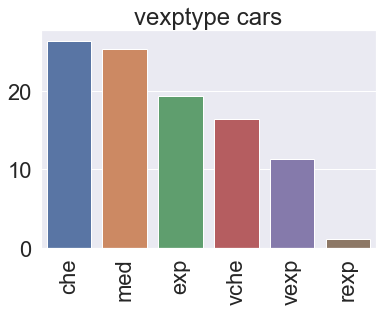

In [130]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'type', 'vexp', 'Model Distribution for ')

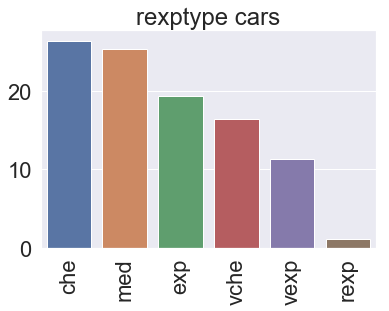

In [131]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'type', 'rexp', 'Model Distribution for ')

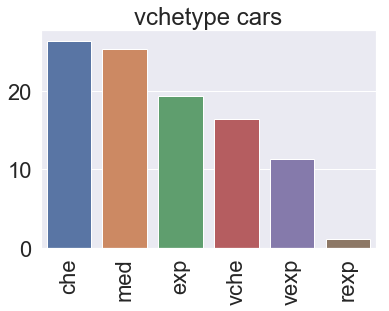

In [132]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'type', 'vche', 'Model Distribution for ')

In [133]:
data.type.value_counts()

SUV            80144
sedan          79905
pickup         40930
truck          39506
coupe          17404
other          12866
hatchback      12396
van             9963
wagon           9897
convertible     8592
mini-van        5906
offroad          650
bus              528
Name: type, dtype: int64

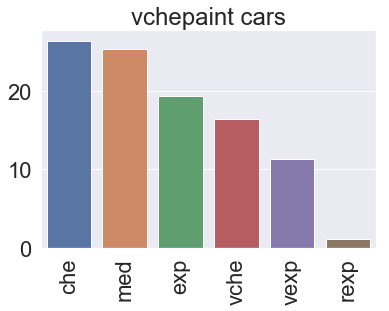

In [134]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'paint', 'vche', 'Model Distribution for ')

In [135]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category'],
      dtype='object')

In [137]:
data.to_csv('vehicles.csv',index=False)

In [ ]:
ax = sns.barplot(x=data.paint_color.value_counts().index, y=data.paint_color.value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
groupby_barchart_percent_distribution(data, 'is_expensive', 'paint_color', 'che', 'Model Distribution for ')

In [ ]:
groupby_barchart_percent_distribution(data, 'is_expensive', med, 'Model Distribution for ', None)

In [ ]:
print_distribution(bmw,'is_expensive','Expense Category Breakdown of BMW')

In [ ]:
print_distribution(tesla,'is_expensive','Expense Category Breakdown of Tesla')

In [ ]:
print_distribution(gmc,'is_expensive','Expense Category Breakdown of GMC')

In [ ]:
data.columns

In [ ]:
regions = [region.split('/')[0].replace(' ','') for region in data.region]
data['region'] = regions

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#plt.figure = (25,10)

In [ ]:
#plt.figure

In [ ]:
sns.barplot(x=data['region'].value_counts()[:10].index, y=data['region'].value_counts()[:10])

In [ ]:
data.columns

In [ ]:
sns.barplot(x=data['type'].value_counts()[:13].index, y=data['type'].value_counts()[:13])

In [ ]:
data['type'].value_counts()[:13].index

In [ ]:
data['type'].value_counts().shape

In [ ]:
data.columns

In [ ]:
data.condition.value_counts()

In [ ]:
sns.barplot(x=data['condition'].value_counts()[:6].index, y=data['condition'].value_counts()[:6])

In [ ]:
sns.barplot(x=data['manufacturer'].value_counts()[:10].index, y=data['manufacturer'].value_counts()[:10])

In [ ]:
data.columns

In [ ]:
sns.barplot(x=data['model'].value_counts()[:10].index, y=data['model'].value_counts()[:10])

In [ ]:
data['model'].value_counts()[:10].index

In [ ]:
data['fuel'].value_counts()

In [ ]:
sns.barplot(x=data['fuel'].value_counts()[: :].index, y=data['fuel'].value_counts()[: :])

In [ ]:
data.columns

In [ ]:
sns.barplot(x=data['transmission'].value_counts()[: :].index, y=data['transmission'].value_counts()[: :])

In [ ]:
sns.barplot(x=data['drive'].value_counts()[: :].index, y=data['drive'].value_counts()[: :])

In [ ]:
data.description[0]

In [ ]:
for i in range(0,10):
    print('*************** NEW DESCRIPTION: ' + str(i) + '  *************************')
    print()
    print()
    print()
    print(data.description[i])
    print()
    print()
    print()

In [ ]:
data['description_length'] = [len(description) if isinstance(description, str) else 0 for description in data.description ]
# [x+1 if x >= 45 else x+5 for x in l]
#[x+1 if x >= 45 else x+5 for x in l]
#[ expression for item in list if conditional ]


In [ ]:
data.description_length.describe()

In [ ]:
sns.distplot(data.description_length)

In [ ]:
import numpy as np

In [ ]:
np.percentile(data.description_length, 99.5)

In [ ]:
for i in range(0,20):
    print('*************** NEW DESCRIPTION: ' + str(i) + '  *************************')
    print('Description Length: ' + str(data.description_length[i]))
    print()
    print()
    print()
    print(data.description[i])
    print()
    print()
    print()

anything above 2000 words is unnecessary

In [ ]:
from wordcloud import WordCloud

In [ ]:
import sys
print(sys.executable)

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data['description_length'] = [len(description) if isinstance(description, str) else -1 for description in data.description ]
data['valid_descriptions'] = [description if isinstance(description, str) else '' for description in data.description ]

In [ ]:
descriptions = list()
num_errors = 0
for i in range(0,data.shape[0]):
    try:
        if data.description_length[i] < 2000 and data.description_length[i] > 0:
            descriptions.append(data.valid_descriptions[i])
    except:
        num_errors += 1
        #print('Error')
        #print('Row: ' + str(i))
        #print(data.loc[i,:])
        
print('Number of rows with errors: ' + str(num_errors))

In [ ]:
#nltk.download('punkt')

In [ ]:
#nltk.download('stopwords')

In [ ]:
'''
words = " ".join(descriptions)
'''
stop_words = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 
            'very', 'having', 'with', 'the', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 
            'of', 'most', 'itself', 'other', 'off', 'is','am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 
            'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her',
            'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 
            'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does',
            'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 
            'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 
            'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}
'''
stop_words = set(stopwords.words('english'))

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stop_words, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()
'''

In [ ]:
# seeing how many cars are sold by state
sns.barplot(x=data['state'].value_counts()[:10].index, y=data['state'].value_counts()[:10])

In [ ]:
data['state'].value_counts()[:10].index

In [ ]:
data.columns

In [ ]:
pd.pivot_table(data, index = ['state'], values = 'price', aggfunc = np.median).sort_values('price', ascending = False)

In [ ]:
type(pd.pivot_table(data, index = ['state'], values = 'price', aggfunc = np.median).sort_values('price', ascending = False))

In [ ]:
# why is montana so high, do a pandas groupby, are there a lot of cars that are sold in montana? 
# can do another pivot table for that

In [ ]:
state_car_counts = pd.pivot_table(data, index = ['state'], values = 'price', aggfunc = 'count').sort_values('price', ascending = False)

In [ ]:
state_car_counts.head()

In [ ]:
state_car_counts.loc[ 'mt' , 'price']

In [ ]:
state_car_counts.price.describe()

In [ ]:
# create state_count for each row
data['state_car_count'] = [state_car_counts.loc[state, 'price'] for state in data.state]

In [ ]:
data['state_car_count'].head()

In [ ]:
data.state.head

In [ ]:
data.head()

In [ ]:
state_car_counts.loc[ 'az' , 'price']

In [ ]:
montana = data.groupby('state').get_group('mt')

In [ ]:
montana.head()

In [ ]:
state_car_counts

In [ ]:
pd.pivot_table(data, index = ['state'], values = 'price', aggfunc = np.sum).sort_values('price', ascending = False)

In [ ]:
pd.pivot_table(data, index = ['state'], values = 'price', aggfunc = np.median).sort_values('price', ascending = False)

In [ ]:
montana.columns

In [ ]:
montana.manufacturer.value_counts()

In [ ]:
sns.distplot(montana.price)

In [ ]:
california = data.groupby('state').get_group('ca')

In [ ]:
sns.distplot(california.price)

In [ ]:
california.manufacturer.value_counts()

In [ ]:
ford = data.groupby('manufacturer').get_group('ford')

In [ ]:
sns.distplot(data.price)

The price distribution matches california far greater than it matches montana, so that means more expensive cars are being sold in Montana

In [ ]:
montana.columns

In [ ]:
sns.barplot(x=montana['condition'].value_counts()[: :].index, y=montana['condition'].value_counts()[: :])

In [ ]:
sns.barplot(x=california['condition'].value_counts()[: :].index, y=california['condition'].value_counts()[: :])

In [ ]:
# Pie chart
def draw_pie_chart(data,column):
    
    labels = data[column].value_counts()[: :].index
    sizes = data[column].value_counts()[: :]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()

In [ ]:
draw_pie_chart(montana,'condition')

In [ ]:
draw_pie_chart(california,'condition')

In [ ]:
montana.columns

In [ ]:
data['condition'].value_counts()[: :].index

In [ ]:
len(data['condition'].value_counts()[: :].index)

In [ ]:
data['condition'].value_counts()[: :].index[0]

In [ ]:
data['condition'].value_counts()[0]

In [ ]:
print_distribution(montana,'condition','Condition Distribution for Montana')

In [ ]:
median_state_car_prices = pd.pivot_table(data, index = ['state'], values = 'price', aggfunc = np.median).sort_values('price', ascending = False)

In [ ]:
median_state_car_prices.describe()

In [ ]:
median_state_car_prices

In [ ]:
va = data.groupby('state').get_group('va')

In [ ]:
va.shape

In [ ]:
sns.distplot(va.price)

In [ ]:
sns.distplot(data.price)

In [ ]:
data.price.describe()

In [ ]:
va.price.describe()

In [ ]:
#va.price.condition
sns.barplot(x=va['condition'].value_counts()[: :].index, y=va['condition'].value_counts()[: :])

In [ ]:
print_distribution(va,'condition','Condition Distribution for Virginia')

In [ ]:
print_distribution(va,'condition','Condition Distribution for Virginia')